## Transform Kaggle to resemble MNIST

In [20]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt


2022-11-25 02:11:40.651270: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.



----------------Contoured Image--------------------


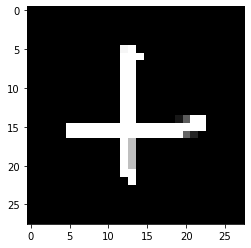

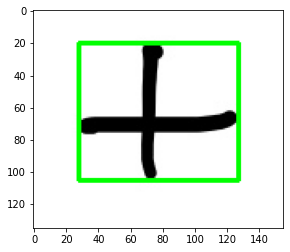

In [85]:
image = cv2.imread('/Users/davidperez/Documents/GitHub/ideal-funicular/datasets/kaggle_dataset/23.jpg')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV+ cv2.THRESH_OTSU)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []
bounded_digits = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
    # bounded_digits.append(digit)

print("\n----------------Contoured Image--------------------")

plt.imshow(preprocessed_digits[0], cmap="gray")
plt.show()
plt.imshow(image, cmap="gray")
plt.show()
    



----------------Original Image--------------------


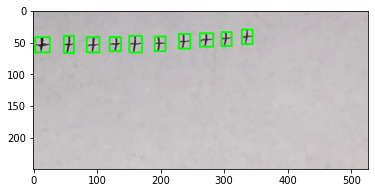

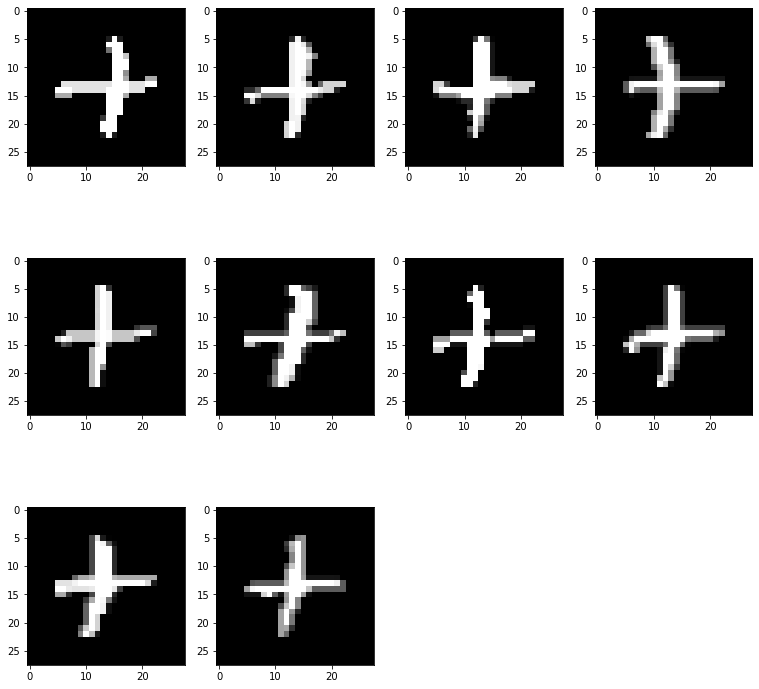

In [2]:
image = cv2.imread('./add_secondSetFlash.jpg')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []
bounded_digits = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # @todo create a ratio to better square a general image
    # CHANGE NARROW OBJECTS TO SOON BE (18,18) PIXEL DIGIT
    # HAND SCENARIO WHEN IMAGE IS NARROW; y pixel length is less than 10 pixels
    x, y = digit.shape


    padded_digit = digit.copy()

    if (y < 10):
        # Padd x-axis
        difference = round((28 - y)/2)
        padded_digit = np.pad(padded_digit, ((0,0),(difference,difference)),"constant", constant_values=0)

    # Resize digit
    resized_digit = cv2.resize(padded_digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
    # bounded_digits.append(digit)

print("\n----------------Original Image--------------------")
plt.imshow(image)
plt.show()

inp = np.array(preprocessed_digits)

bounded_digit_index = 0

columns = 4
rows = math.ceil( len(preprocessed_digits) / columns)
fig = plt.figure(figsize=(13, 13))

for i in range(1, rows*columns - 1):
    # Make prediction on each image before plotting
    # prediction = model.predict(preprocessed_digits[i-1].reshape(1, 28, 28, 1))

    p = fig.add_subplot(rows, columns, i)
    # plt.xlabel('PREDICTION: {0}'.format(np.argmax(prediction)), fontsize=30)    
    plt.imshow(preprocessed_digits[i - 1], cmap='gray')

    

### Performing Preprocessing For All Images in "add" Directory

## Create Rotations for for kaggle_dataset/add_preproc

## Prepcosess for Other Kaggle Dataset
### [Dataset link](https://www.kaggle.com/datasets/michelheusser/handwritten-digits-and-operators?datasetId=763806)

## Rotate Proprocessed Images by 90 Degrees CounterClockwise

# @TODO FIX NAMING OF FILES FOR C_90 FOLDER!!!!

## Cleaning code for duplicating files:

# Protability Testing New Dataset with MNIST

In [3]:
from tensorflow import keras
import cv2


# @brief Generate data subsets for neural net model.
def create_mnist_train_test():
  # number of images, 28x28 pixels
  # Shape: X:(60000, 28, 28), Y:(10000, 28, 28)
  (X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

  # Create validation set and convert to float in 0-1 range
  X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
  y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
  X_test = X_test / 255.

  #mnist_labels_to_strs()

  return X_train,  X_valid, X_test, y_train, y_valid, y_test

# def mnist_labels_to_strs():

#   # Convering mnist dataset from numpy.uint8 to string
#   y_train_str = y_train_full.astype(str)

#   return 



### MAIN ###
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

# '0' parameter loads the color scale with image
# Converts it to the shape of mnist (28, 28, 3) -> (28, 28)
image = cv2.imread('./kaggle_dataset/add_preproc_duplicated/23.jpg', 0)

print(image.shape)

print(X_train_full[0].shape)



2022-12-20 22:12:54.639258: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
[ WARN:0@11134.166] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('./kaggle_dataset/add_preproc_duplicated/23.jpg'): can't open/read file: check file path/integrity


AttributeError: 'NoneType' object has no attribute 'shape'

In [7]:
# Creating labels for our new dataset:

# @TODO Make enough "+" strings for all new images to be added to dataset

image_names_duplitcated = os.listdir("./kaggle_dataset/add_preproc_duplicated/")

y_add_plus = ["+" for img in range(len(image_names_duplitcated))]

print(len(y_add_plus))
print(len(image_names_duplitcated))

#Before converting
print("import mnist: ", y_train_full)

# Convering mnist dataset from numpy.uint8 to string
y_train_str = y_train_full.astype(str)

print("mnist converted to string: ", y_train_str)

# print(y_train_str)



2265
2265
import mnist:  [5 0 4 ... 5 6 8]
mnist converted to string:  ['5' '0' '4' ... '5' '6' '8']


In [ ]:

# @TODO clean all code make better named folders and a central location